## Show the directories of the train and test datasets

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Load the data and make the dataframes

In [2]:
# Load the data 
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
# Make a dataframe
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

# Print out the dataframe
# display(test_df)

# Show the test data 
# display(train_df)

pd.set_option('display.min_rows', 10) 
pd.set_option('display.max_rows', 10) 

list_1 = []
for x in train_df["Cabin"]:
    if isinstance(x, str):
        #print(x, type(x))
        list_1.append(x[0])
    else:
        pass
    

print(set(list_1), len(list_1))



{'D', 'E', 'G', 'C', 'B', 'T', 'A', 'F'} 204


In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

def prepare_dataframe(df):
    new_df = df.copy(deep=True)
    
    new_df["Cabin"] = new_df["Cabin"].notnull().astype('int')
    
    numeric_features = ["Age", "Fare"]
    numeric_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy="mean"))])
        
    preprocessor = ColumnTransformer(transformers = [("num", numeric_transformer, numeric_features)])
    
    preprocessor.fit(new_df)
    
    transformed_data = preprocessor.transform(new_df)
    
    new_df[numeric_features] = transformed_data
    
    return pd.DataFrame(new_df)

new_train_df = prepare_dataframe(train_df)
display(new_train_df)
     
print(new_train_df["Fare"].isna().sum())
print(train_df["Fare"].isna().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1,C


0
0


## Create new dataframe with Nan values replaced by the mean 


In [4]:
train_df_filled = train_df.copy(deep=True)
train_df_filled.fillna({"Age" : train_df_filled["Age"].mean()}, inplace=True)

test_df_filled = test_df.copy(deep=True)
test_df_filled.fillna({"Age" : test_df_filled["Age"].mean(), "Fare" : test_df_filled["Fare"].mean()}, inplace=True)

#Show the sums of Nan values for the age of train_df and train_df_filled
display(train_df["Age"].isna().sum())
display(train_df_filled["Age"].isna().sum())

display(test_df["Age"].isna().sum())
display(test_df_filled["Age"].isna().sum())

train_df_filled.fillna({"Embarked" : "Null"}, inplace=True)

display(train_df_filled["Embarked"].isna().sum())


177

0

86

0

0

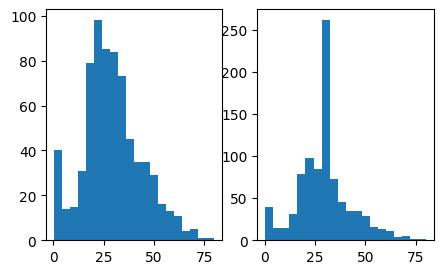

In [5]:
#Plotting histograms of the feature variables
fig, ax = plt.subplots(nrows=1, ncols=2, 
                       figsize = (5,3))

#print(len(train_df["Age"]), len(train_df_missing["Age"]))

ax[0].hist(train_df["Age"], bins=20);

ax[1].hist(train_df_filled["Age"], bins=20);

In [6]:

# One hot encoding on the easy categorical features such as Sex and Embarked

# Remove the survived column for the one hot encoding
pd.set_option('display.max_rows', 100)
train_df_filled_x = train_df_filled.copy(deep=True)
train_df_filled_x.drop("Survived", axis=1, inplace=True)

# Import Onehotencoder and columntransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Instantiate Class
categorical_features = ["Sex", "Embarked"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                  remainder="passthrough")

# One hot encoding for training set
transformed = transformer.fit_transform(train_df_filled_x[["Pclass",
                                        "Sex","Age", "SibSp", "Parch", "Fare", "Embarked"]])
train_df_filled_x_trans = pd.DataFrame(transformed)

# One hot encoding for test set
transformed_test = transformer.fit_transform(test_df_filled[["Pclass",
                                        "Sex","Age", "SibSp", "Parch", "Fare", "Embarked"]])
test_df_filled_trans = pd.DataFrame(transformed_test)


# Drop the column corresponding to 'Null' in the Embarked column
train_df_filled_x_trans.drop(train_df_filled_x_trans.columns[3], axis=1, inplace=True)


# dummies_train = pd.get_dummies(train_df_filled_x[["Sex", "Embarked", "Pclass"]].astype(str))
# display(dummies_train)

columns_list = list(pd.get_dummies(train_df_filled_x[["Sex", "Embarked"]].astype(str)).columns)
del columns_list[3]
display(columns_list)

print(columns_list)

train_df_filled_x_trans.columns = columns_list+["Pclass","Age", "SibSp", "Parch", "Fare"]
test_df_filled_trans.columns = columns_list+["Pclass", "Age", "SibSp", "Parch", "Fare"]

display(train_df_filled_x_trans)
display(train_df_filled_x)



# train_df_filled_x_trans.columns = 


['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.0,1.0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,1.0,38.000000,1.0,0.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,3.0,26.000000,0.0,0.0,7.9250
3,1.0,0.0,0.0,0.0,1.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,2.0,27.000000,0.0,0.0,13.0000
887,1.0,0.0,0.0,0.0,1.0,1.0,19.000000,0.0,0.0,30.0000
888,1.0,0.0,0.0,0.0,1.0,3.0,29.699118,1.0,2.0,23.4500
889,0.0,1.0,1.0,0.0,0.0,1.0,26.000000,0.0,0.0,30.0000


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [7]:
# Previous troubleshooting of mismatched columns between training and test set 

# display(train_df_filled_x)
# display(train_df_filled_x_trans)

# display(test_df_filled)
#display(test_df_filled_trans)

'''
dummies_train = pd.get_dummies(train_df_filled_x[["Sex", "Embarked"]])
display(dummies_train)

dummies_test = pd.get_dummies(test_df_filled[["Sex", "Embarked"]])
display(dummies_test)
'''
""""
display(train_df_filled_x)


print(train_df_filled_x.columns)
print(train_df_filled.columns)
"""

# print(train_df_filled['Embarked'].unique())
# test_df_filled['Embarked'].unique()

'"\ndisplay(train_df_filled_x)\n\n\nprint(train_df_filled_x.columns)\nprint(train_df_filled.columns)\n'

In [8]:
# First RandomForestClassifier 

# Setup the random seed
np.random.seed(42)

# Split up into feature variables and target variables
x_train = train_df_filled_x_trans
y_train = train_df_filled["Survived"]
y_test = test_df_filled_trans

# Import randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

RandomForestClassifier()

In [9]:
importance = clf.feature_importances_
print(importance)

importance_dictionary = {train_df_filled_x_trans.columns[i] : importance[i] for i in range(len(importance)) }

importance_dictionary

[0.15500353 0.12773513 0.01188196 0.0084434  0.01398422 0.08407889
 0.25869225 0.04984792 0.03619298 0.25413971]


{'Sex_female': 0.15500353355121732,
 'Sex_male': 0.12773513327571354,
 'Embarked_C': 0.011881955440859637,
 'Embarked_Q': 0.008443398970548752,
 'Embarked_S': 0.013984223711113774,
 'Pclass': 0.0840788900243836,
 'Age': 0.2586922538886421,
 'SibSp': 0.04984791742192957,
 'Parch': 0.03619298290977262,
 'Fare': 0.2541397108058192}

In [10]:
# Score the classifier
clf.score(x_train, y_train)

# Predict the test set survived values
test_survived_predictions = clf.predict(y_test)

# Making a dictionary of the predictions
test_survived_predictions_data = {"PassengerId" : test_df_filled["PassengerId"], "Survived" : test_survived_predictions}

# Making a DataFrame of the predictions
submission = pd.DataFrame(data = test_survived_predictions_data)

# Creating a CSV file to download to submit predictions
submission.to_csv("/kaggle/working/my_titanic_submission.csv", index=False)